In [ ]:
#cropping,flipping(mirror),rotating,shifting: Preprocessing
#cv.WrapAfine(image,dim,(w,h)) ....shifting
#dim=cv.getmatrix2d(center,degree)
#cv.WrapAfina(image,dim,(w,h))
#cv.resize(image,(w,h))
#imutils.resize(image,width=)
#cv.flip(image,0 or 1)
#cv.rectangle(where at which picture,(starting point),(ending point),color,thickness)....creatig rectangle
#cv,circle(where, (cen,ter),radius,color,thickness)
#bitwise merging two images we have and or xor
#cv.calcHist([image3],[0],None,[256],[0,256]) ... takes array of image, number of channel,mask,size,xaxis length
#cv.erode(image,kernel,iterations=5) and cv.dilate kernel ... np.ones((si,ze),dtype=int)
#cv.morphologyEx(noiseimage,cv.MORPH_OPEN,kernel) and close  kernel like brush same for erode and dilate
#cv.filter2D(image,-1,kernel)kernel depends prewitt or sobel where kernel cv.hypot(kernelx,kernel,y)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt




(540, 720, 3)


-1

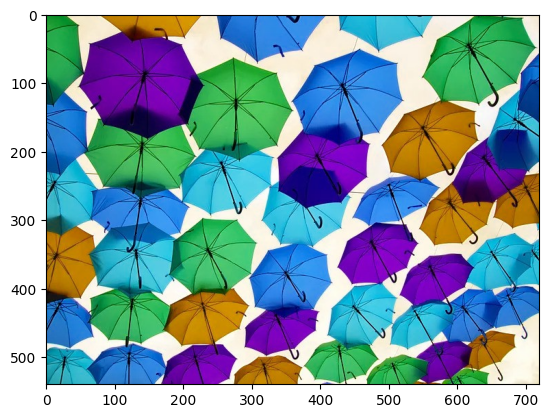

In [3]:
image=cv.imread(r"C:\Users\asus\Downloads\TheAIEngineers-Notebooks-master\ComputerVisionNotebooks\DATA\colors.jpg")
plt.imshow(image)#display image inside matplot
print(image.shape)
cv.imshow('original',image)#display image on in open cv window #cv.imageshow takes numpy array
cv.waitKey(0)


Translation

WrapAfine for shifting and rotating

In [ ]:
#translation means shift image along xaxis and yaxis
m=np.float32([
    [1,0,25],
    [0,1,30]
])#25(tx) pixel shift (along xaxis) left or right where as 50(ty) pixels shift up or down
shifted1=cv.warpAffine(image,m,(image.shape[1],image.shape[0]))
#wrapAffine for translation takes image,matrix ,width and height(size of output image , dimension)
cv.imshow("shifted down and right",shifted1)
cv.waitKey(0)
#image convention positive y axis down and negative y axis up
#for that reason (0,300) refers to bottom left where y axis is positive and down
# and (300,0) top right and (0,0) top left 

-1

In [ ]:
#translation means shift image along xaxis and yaxis
m=np.float32([
    [1,0,-25],
    [0,1,-50]
])#25(tx) pixel shift (along xaxis) left or right where as 50(ty) pixels shift up or down
shifted2=cv.warpAffine(image,m,(image.shape[1],image.shape[0]))
cv.imshow("shifted up and left",shifted2)
cv.waitKey(0)

-1

In [6]:
def translate(image,x,y):
    m=np.float32([
        [1,0,x],
        [0,1,y]
    ])
    shifted3=cv.warpAffine(image,m,(image.shape[1],image.shape[0]))
    return shifted3
cv.imshow("shifted3",translate(image,-50,30))
cv.waitKey(0)

-1

Rotation

In [ ]:
(h,w)=image.shape[0:2]
center=w//2, h//2 # center (x,y) and y yaxis s the height  and xaxis width
m=cv.getRotationMatrix2D(center,45,0.5)
#get rotation give it data and give me matrix ( center, angle of rotation and scale which is zoom in if we increase it)
rotated=cv.warpAffine(image,m,(w,h))
#wrapafine takes image original, matrix and size(widt,height))
cv.imshow("rotated by 45 degrees",rotated)
cv.waitKey(0)

-1

In [8]:
def rotate(A,degree,scale):
    (h,w)=A.shape[0:2]
    center=w//2,h//2
    m=cv.getRotationMatrix2D(center,degree,scale)
    rotated=cv.warpAffine(A,m,(w,h))
    return rotated
cv.imshow("rotation",rotate(image,60,1.0))
cv.waitKey(0)

-1

*cv.imshow() (OpenCV) is like a video call window. It continuously updates the image being displayed in real-time: 

1.Your webcam is constantly capturing images (video frames).

2.Each new frame is sent to your friend’s screen, and you both see a live stream of images (video feed).

3.Each frame is updated in the window. If you smile or move, the video feed updates immediately.


*img.show() (Pillow) Is for showing one static image, like viewing a single photo, not suitable for real-time, interactive displays like a video call.

In [9]:
# cv.img show needs to be as array so we can convert img to array then to BGR from RGB since cv is BGR then display it suing cv.imgshow display images within an OpenCV-specific window
#from PIL import Image
#path=r"C:\Users\asus\Downloads\TheAIEngineers-Notebooks-master\ComputerVisionNotebooks\DATA\colors.jpg"
#image=Image.open(path)
#img=image.rotate(45)
#img=img.resize(45,45)
#img.save("kk.jpg")
#img.show()
# or
# img=np.array(img)
#img=cv.cvtColor(img,cv.COLOR_RGB2BGR)
#cv.imshow("l",img)
#cv.waitKey(0)


CV resizing

In [35]:
#Even though dimensions are typically represented as (width, height) in general, in image processing, height comes first, followed by width and then channels so img.shape gives(height,width)(row,column)
h=image.shape[0]
w=image.shape[1]
print(h,w)
r=50.0/h#raio
print(r)#(1% of picture )
#dimenssion i want width new = width old times ration and new height 50
dim=(int(w*r),50)
resized=cv.resize(image,dim)
cv.imshow("resized",resized)#now new image with height 50 and width 66(720*ratio)
cv.waitKey(0)
print(resized.shape)

540 720
0.09259259259259259
(50, 66, 3)


Second method for resizing

In [ ]:
import imutils
print(image.shape)
resized=imutils.resize(image,width=400)
cv.imshow("re",resized)
cv.waitKey(0)
print(resized.shape)


(540, 720, 3)
(300, 400, 3)


Using function

In [12]:
def resized(im,X):
    resize=imutils.resize(im,width=X)
    return resize
cv.imshow("k",resized(image,50))
cv.waitKey(0)

-1

flipping(e2lib sora)

In [37]:
flipped=cv.flip(image,0)#negative side of xaxis
cv.imshow("flipped vertically",flipped)
cv.waitKey(0)


-1

In [38]:
flipped=cv.flip(image,1)#negative side of y axis
cv.imshow("flipped horizentally",flipped)
cv.waitKey(0)

-1

In [15]:
flipped=cv.flip(image,-1)
cv.imshow("flipped both",flipped)
cv.waitKey(0)

-1

Cropping image

In [16]:
image.shape

(540, 720, 3)

In [39]:
#image is array so cropping moving pixels
cropped=image[30:120,240:335]
cv.imshow("cropped",cropped)
cv.waitKey(0)

-1

In [40]:
print(image)
m=np.ones(image.shape,dtype="uint8")*50 #now we have array like array of image fill it ones then change 1 to 50
subtracted=cv.subtract(image,m)
subtracted

[[[ 12 141  42]
  [ 14 143  44]
  [ 15 144  45]
  ...
  [237 227 203]
  [237 226 204]
  [236 225 203]]

 [[ 14 143  44]
  [ 14 143  44]
  [ 14 143  44]
  ...
  [239 229 205]
  [238 227 205]
  [239 228 206]]

 [[ 15 145  44]
  [ 14 144  43]
  [ 16 144  43]
  ...
  [239 228 206]
  [239 228 206]
  [240 229 207]]

 ...

 [[ 19 134 147]
  [ 19 134 147]
  [ 14 129 144]
  ...
  [240 231 197]
  [235 226 192]
  [235 226 192]]

 [[ 14 129 140]
  [ 20 135 148]
  [  3 118 133]
  ...
  [237 228 194]
  [232 223 189]
  [233 225 188]]

 [[ 12 127 138]
  [ 19 134 145]
  [  0 110 125]
  ...
  [235 226 192]
  [230 222 185]
  [231 223 186]]]


array([[[  0,  91,   0],
        [  0,  93,   0],
        [  0,  94,   0],
        ...,
        [187, 177, 153],
        [187, 176, 154],
        [186, 175, 153]],

       [[  0,  93,   0],
        [  0,  93,   0],
        [  0,  93,   0],
        ...,
        [189, 179, 155],
        [188, 177, 155],
        [189, 178, 156]],

       [[  0,  95,   0],
        [  0,  94,   0],
        [  0,  94,   0],
        ...,
        [189, 178, 156],
        [189, 178, 156],
        [190, 179, 157]],

       ...,

       [[  0,  84,  97],
        [  0,  84,  97],
        [  0,  79,  94],
        ...,
        [190, 181, 147],
        [185, 176, 142],
        [185, 176, 142]],

       [[  0,  79,  90],
        [  0,  85,  98],
        [  0,  68,  83],
        ...,
        [187, 178, 144],
        [182, 173, 139],
        [183, 175, 138]],

       [[  0,  77,  88],
        [  0,  84,  95],
        [  0,  60,  75],
        ...,
        [185, 176, 142],
        [180, 172, 135],
        [181, 173, 136]]

Arithmetic operation

In [42]:
m=np.ones(image.shape,dtype="uint8")*220 #now we have array like array of image fill it ones then change 1 to 50
subtracted=cv.subtract(image,m)
cv.imshow('or',image)
cv.imshow("subtracted",subtracted)
cv.waitKey(0)
#colors changed we play on the pixels numbers so colors since each integer is btw 0 and 255 that represent color

-1

In [48]:
ractangle=np.zeros((300,300),dtype="uint8")
cv.rectangle(ractangle,(25,25),(275,275),255,-1)
#start from 25 and 25 means left up then till bottom right , -1 menas all filled not just outline
cv.imshow("rectangle",rectangle)
cv.waitKey(0)

-1

In [44]:
circle=np.zeros((300,300),dtype="uint8")
#xcenter=circle.shape[1]
#ycenter=circle.shape[0]
cv.circle(circle,(150,150),150,255,-1)#radius 150and center 150,150 and thickness -1 and color white
#start from 25 and 25 means left up then till bottom right , -1 menas all filled not just outline
cv.imshow("rectangle",circle)
cv.waitKey(0)

-1

Bitwise Operation

In [49]:
bitwise=cv.bitwise_and(circle,rectangle)
cv.imshow("bitwise&",bitwise)
cv.waitKey(0)

-1

In [50]:
bitwiseor=cv.bitwise_or(rectangle,circle)
cv.imshow("bitwiseor",bitwiseor)
cv.waitKey(0)

-1

In [51]:
bitwisexor=cv.bitwise_xor(rectangle,circle)
cv.imshow("bitwisexor",bitwisexor)
cv.waitKey(0)

-1

In [52]:
bitwisenot=cv.bitwise_not(rectangle,circle)
cv.imshow("bitwisexor",bitwisenot)
cv.waitKey(0)

-1

Masking(i want part of picture by masking it and other part i dont want it)

We are working with a mask that selects a rectangular region in the center of the image, and then you're applying a bitwise AND operation to extract only the part of the image that overlaps with that mask

The mask determines which pixels are included (where the mask is white) and which are excluded (where the mask is black).

In [ ]:
mask=np.zeros(image.shape[:2],dtype="uint8")
(cx,cy)=image.shape[1]//2, image.shape[0]//2
cv.rectangle(mask,(cx-75,cy-75),(cx+75,cy+75),255,-1)
cv.imshow("rectangle",mask)
cv.waitKey(0)
#create black image same size as original image, and draw inside it a rectangle at center(image and circle at same center)


-1

Mask Creation: The mask is a black image with a white rectangle . This means that only the region inside the rectangle (where the mask is white) will be affected.

Mask Application: The cv.bitwise_and() function is used to apply the mask. It keeps the original pixel values where the mask is white and makes the rest black (i.e., the areas outside the rectangle are turned black).

Result: Only the region inside the rectangle will remain visible in the result, while the rest of the image will be black.

In [ ]:
bitwise=cv.bitwise_and(image,image,mask=mask)
cv.imshow("merged",bitwise)
cv.waitKey(0)


-1

Color Spaces

In [28]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
cv.imshow("gray",gray)
cv.waitKey(0)
hsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)
cv.imshow("hsv",hsv)
cv.waitKey(0)
lab=cv.cvtColor(image,cv.COLOR_BGR2Lab)
cv.imshow("lab",lab)
cv.waitKey(0)

-1

Histogram :Distribution of color intensity

In [56]:
import matplotlib.pyplot as plt


# Read the image (it should be a grayscale image)
image2 = cv.imread(r"C:\Users\asus\Downloads\TheAIEngineers-Notebooks-master\ComputerVisionNotebooks\DATA\grayscale_image.jpg")
print(image2.shape)  # This prints the shape of the original image, which should be (height, width, 3) for a BGR image

# Convert to grayscale from GBR (single channel image)
image3 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
print(image3.shape)
cv.imshow("image3", image3)  # Show the grayscale image
cv.waitKey(0)




(682, 1024, 3)
(682, 1024)


-1

cv.calcHist() is an OpenCV function that computes the histogram of an image.

[image3]: This is a list of images (in this case, just one image). Since OpenCV's calcHist function can process multiple images at once, you put the image inside a list.

[0]: This refers to the channel index. Since you're working with a grayscale image, there's only one channel (the intensity channel). Therefore, 0 indicates you're working with the first (and only) channel.

None: This is the mask. If it's set to None, the entire image will be used to compute the histogram. If you had a mask (a binary image), it would calculate the histogram for only the masked region.

[256]: This defines the number of bins in the histogram. In this case, it's 256 bins, which correspond to the 256 possible pixel intensity values in a grayscale image (from 0 to 255).

[0, 256]: This is the range of pixel intensities, which is from 0 (black) to 255 (white). xaxis( intensity of each pixel_)

cv.calcHist([images], [channel], mask, histSize, ranges)

Bin 0: Pixels with intensity values between 0 and 1 (usually just intensity 0).

Bin 1: Pixels with intensity values between 1 and 2.

Bin 2: Pixels with intensity values between 2 and 3.

...

Bin 255: Pixels with intensity values between 255 and 255 (just intensity 255)


In [57]:
image3

array([[114, 114, 112, ..., 165, 165, 165],
       [114, 114, 112, ..., 165, 165, 165],
       [114, 114, 112, ..., 165, 165, 165],
       ...,
       [ 63,  63,  61, ..., 211, 211, 211],
       [ 63,  65,  64, ..., 216, 215, 214],
       [ 63,  65,  64, ..., 216, 215, 214]],
      shape=(682, 1024), dtype=uint8)

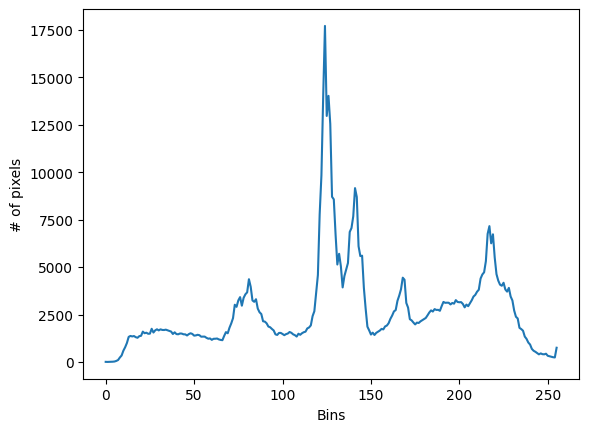

In [60]:
hist=cv.calcHist([image3],[0],None,[256],[0,256])#array of images, channel ,mask none, size (255),range
plt.figure()
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)

Graph above first we have 2D array gray scale image with each pixel value betwen 0 and 255 (o black , 255 whute and btw 0 and 255 gray) and x axis we have intensities from 0 to 255 so array we notice that o intensity occurs in 4 pixels and  20 occurs in 5 pixels... now we can see which color most appear

cv.split(image) in OpenCV is used to split a multi-channel image (like an RGB image) into its individual channels
cv.split(image), you will get three separate images (or arrays) representing each of the Red, Green, and Blue channels of the original image.

(540, 720, 3)
(540, 720)
[[ 42  44  45 ... 203 204 203]
 [ 44  44  44 ... 205 205 206]
 [ 44  43  43 ... 206 206 207]
 ...
 [147 147 144 ... 197 192 192]
 [140 148 133 ... 194 189 188]
 [138 145 125 ... 192 185 186]]


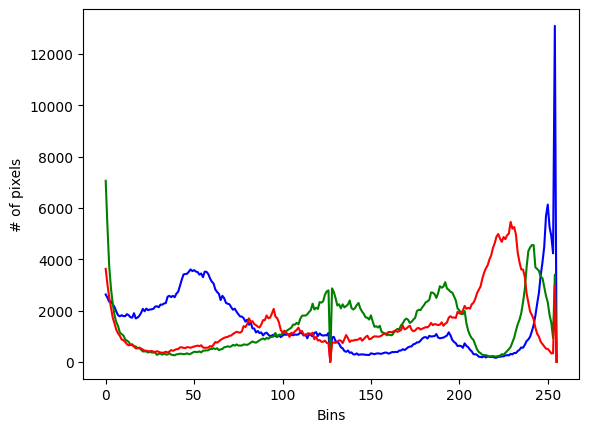

In [ ]:
color=cv.imread(r"C:\Users\asus\Downloads\TheAIEngineers-Notebooks-master\ComputerVisionNotebooks\DATA\colors.jpg")
chan=cv.split(color)
colors=("b","g","r")
plt.figure()
plt.xlabel("Bins")
plt.ylabel("# of pixels")
#here channel tuple includes(blue,green,red) where each is array (540,720) channel[0]=blue

for chan,colors in zip(chan,colors):#zip=((blue,b),(green,g)).. mergetwo tuples
    hist=cv.calcHist([chan],[0],None,[256],[2,256])#array of images, channel ,mask none, size (255),range
    plt.plot(hist,color=colors)
print(color.shape)
print(chan.shape)
print(chan)


Blurring picture

The hstack function in Python, specifically in libraries like NumPy, is used to stack arrays horizontally

In [ ]:
blurred=np.hstack(
    [cv.blur(color,(5,5)),
     cv.blur(color,(7,7))]
)
#cv.blur take image and kernel size, filter, 3*3  blur
cv.imshow("blurred",blurred)
cv.waitKey(0)

-1